In [3]:
import csv
from datetime import datetime

# filename='./sitka_weather_2018_simple.csv' 
filename='./death_valley_2018_simple.csv' 

with open(filename) as f:
	reader = csv.reader(f)
	header_row = next(reader)
	for index, column_header in enumerate(header_row):
		print(index, column_header)

	# Get high temperatures from this file
	dates,highs, lows = [],[], []
	for row in reader:
		current_date = datetime.strptime(row[2], '%Y-%m-%d')
		try:
			high = int(row[4])
			low = int(row[5])
		except ValueError:
			print(f'Missing data for {current_date}')
		else:
			dates.append(current_date)
			highs.append(high)
			lows.append(low)
	
	print(highs)
	

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS
Missing data for 2018-02-18 00:00:00
[65, 61, 69, 69, 74, 74, 77, 62, 60, 64, 67, 68, 73, 72, 73, 70, 71, 71, 78, 68, 69, 66, 69, 69, 75, 69, 69, 81, 81, 79, 78, 79, 81, 81, 87, 85, 88, 83, 85, 82, 82, 73, 70, 72, 74, 76, 76, 76, 66, 62, 65, 67, 64, 60, 70, 69, 62, 69, 77, 77, 73, 70, 72, 79, 75, 80, 83, 80, 82, 85, 90, 80, 77, 77, 73, 74, 81, 79, 83, 79, 84, 81, 79, 79, 84, 94, 96, 97, 99, 97, 90, 93, 95, 96, 98, 100, 96, 97, 104, 103, 83, 86, 91, 95, 82, 79, 87, 78, 95, 99, 103, 104, 105, 106, 108, 104, 95, 95, 85, 84, 82, 97, 102, 105, 110, 108, 109, 116, 107, 104, 94, 95, 97, 100, 101, 97, 102, 105, 103, 97, 100, 103, 104, 95, 94, 102, 108, 111, 110, 101, 107, 113, 118, 117, 114, 109, 109, 111, 113, 106, 113, 117, 119, 117, 112, 107, 101, 103, 111, 118, 126, 121, 120, 119, 121, 120, 117, 116, 111, 118, 118, 119, 117, 113, 117, 121, 121, 126, 121, 114, 113, 115, 114, 120, 120, 124, 123, 120, 121, 120, 115, 120, 125, 127, 127, 127, 

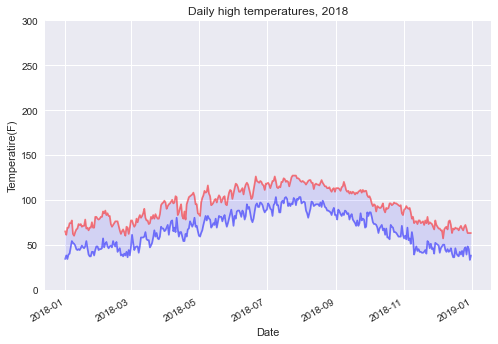

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

ax.set_title('Daily high temperatures, 2018')
ax.set_xlabel('Date')
ax.set_ylim(0, 300)
fig.autofmt_xdate()

ax.set_ylabel('Temperatire(F)')

plt.show()


In [18]:
import json

from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

filename = 'eq_data_30_day_m1.json'

with open(filename) as f:
	all_eq_data = json.load(f)

all_eq_dicts = all_eq_data['features']

mags, lons, lats, hover_texts = [], [], [], []

for eq_dict in all_eq_dicts:
	mag = eq_dict['properties']['mag']
	lon = eq_dict['geometry']['coordinates'][0]
	lat = eq_dict['geometry']['coordinates'][1]
	title = eq_dict['properties']['title']

	mags.append(mag)
	lons.append(lon)
	lats.append(lat)
	hover_texts.append(title)

data = [{
	'type':'scattergeo',
	'lon':lons,
	'lat':lats,
	'text':hover_texts,
	'marker': {
		'size':[5 * mag for mag in mags],
		'color': mags,
		'colorscale':'Viridis',
		'reversescale': True,
		'colorbar':{'title':'Magnitude'},
	}
}]
my_layout = Layout(title='Global Earthquakes')

fig = {'data':data, 'layout':my_layout}

offline.plot(fig, filename='global_earthquakes.html')





'global_earthquakes.html'